In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('features_final.csv') # uploading dataset 

In [3]:
dataset = dataset[["iata", "iso_country", "seaport_count", 
                   "airport_count", "build_count", "industrial_count", 
                   "tourism_count", "terminal_count", "runways_count", 
                   "name_city_1", "population_city_1", "dist_city_1", 
                   "name_city_2", "population_city_2", "dist_city_2", 
                   "name_city_3", "population_city_3", "dist_city_3", 
                   "population_around", "elevation_ft", "lighted", "max_length_ft", 
                   "width_ft", "aptclass", "apttype", "authority", "humuse", 
                   "natural_dis_risk", "informrisk", "lpi_customs", 
                   "lpi_infrastructure", "gard", "airport_area", "airport_type"]]
dataset

iata iso_country  seaport_count  airport_count  build_count  \
0    AAC          EG              0              2           74   
1    AAE          DZ              0              1           95   
2    AAZ          GT              0              5         2465   
3    ABD          IR              0              2          383   
4    ABS          EG              0              1          101   
..   ...         ...            ...            ...          ...   
966  ZNZ          TZ              0              1        55685   
967  ZOS          CL              0              3          137   
968  ZPC          CL              0              1         4268   
969  ZYL          BD              0              5        12179   
970  ZZU          MW              0              0        42239   

     industrial_count  tourism_count  terminal_count  runways_count  \
0                 276           1362               1              1   
1                 111            237               2              2   
2                  82           1279               2              1   
3                2308            829               1              2   
4                   3             24               0              2   
..                ...            ...             ...            ...   
966              1870           3485               0              1   
967               416           1334               1              2   
968               179           1114               0              1   
969                33            395               1              1   
970                13            105               2              1   

            name_city_1  ...   apttype  authority humuse  natural_dis_risk  \
0                 Arish  ...   Airport      Civil     No               4.9   
1                Annaba  ...   Airport      Civil     No               4.7   
2        Quetzaltenango  ...  Airfield      Civil     No               6.7   
3                Abadan  ...   Airport      Civil     No               6.8   
4            Abu Simbel  ...  Airfield      Civil     No               4.9   
..                  ...  ...       ...        ...    ...               ...   
966       Zanzibar City  ...   Airport      Civil     No               5.1   
967     Osorno Province  ...  Airfield      Civil     No               6.2   
968     Cautín Province  ...  Airstrip      Civil     No               6.2   
969  Sunamganj District  ...   Airport      Civil     No               8.2   
970               Mzuzu  ...   Airport      Civil     No               4.5   

     informrisk lpi_customs  lpi_infrastructure  gard  airport_area  \
0           5.1        2.67                2.91   NaN       3918622   
1           3.9        2.28                2.45   NaN       3726703   
2           5.5        2.35                2.27   NaN        715718   
3           5.0        2.46                2.67   NaN       3501077   
4           5.1        2.67                2.91   NaN       4203655   
..          ...         ...                 ...   ...           ...   
966         5.1        2.66                2.72   NaN       2506390   
967         2.8        3.23                3.09   NaN        935325   
968         2.8        3.23                3.09   NaN        446403   
969         5.8        2.33                2.36   NaN       1986265   
970         4.8        2.58                2.56   NaN        322805   

       airport_type  
0    medium_airport  
1    medium_airport  
2     small_airport  
3    medium_airport  
4    medium_airport  
..              ...  
966   large_airport  
967  medium_airport  
968   small_airport  
969  medium_airport  
970  medium_airport  

[971 rows x 34 columns]

In [4]:
# replacing missing values in population and distance with 0

dataset[["population_city_1", "population_city_2", "population_city_3", "dist_city_1", "dist_city_2", "dist_city_3"]] = dataset[["population_city_1", "population_city_2", "population_city_3", "dist_city_1", "dist_city_2", "dist_city_3"]].fillna(0)

In [5]:
# replacing empty fields 

dataset["lighted"] = dataset["lighted"].fillna(0)
dataset['apttype'] = dataset['apttype'].fillna("Unknown")
dataset['aptclass'] = dataset['aptclass'].fillna("Unknown")
dataset['authority'] = dataset['authority'].fillna("Unknown")
dataset['humuse'] = dataset['humuse'].fillna("Unknown")
dataset['gard'] = dataset['gard'].fillna("no")

In [6]:
# calculating population around 
dataset["population_around"] = dataset["population_city_1"] + dataset["population_city_2"] + dataset["population_city_3"]

In [7]:
# calculating tourism ratio

dataset["tourism_count"] = dataset['tourism_count'].replace(0,1) # replacing 0 with 1, so that there is no dividing by 0 when calculating the ratio
dataset["industrial_count"] = dataset['industrial_count'].replace(0,1)
dataset["tourism_industrial_ratio"] = dataset["tourism_count"] / dataset["industrial_count"]

In [8]:
dataset = dataset[["iata", "iso_country", "seaport_count", "airport_count", "build_count", "tourism_industrial_ratio", "terminal_count", "runways_count", "dist_city_1", "dist_city_2", "dist_city_3", "population_around", "elevation_ft", "lighted", "max_length_ft", "width_ft", "aptclass", "apttype", "authority", "humuse", "natural_dis_risk", "informrisk", "lpi_customs", "lpi_infrastructure", "gard", "airport_area", "airport_type"]]

In [9]:
# splitting data into train and test dataset

dataset_train, dataset_test = train_test_split(
    dataset,  test_size=0.33, random_state=42)

In [10]:
dataset_train

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN              0              0           51   
90   BIR          NP              0              5        44722   
911  UPB          CU              0              2          278   
181  CMB          LK              0              8        37677   
274  EOH          CO              0              3        18258   
..   ...         ...            ...            ...          ...   
106  BMO          MM              0              1          213   
270  ELG          DZ              0              0          127   
860  TKG          ID              0              1          276   
435  KAC          SY              0              2          892   
102  BLG          MY              0              1           64   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                 67.000000               1              2         0.00   
90                   1.465169               2              2         1.93   
911                 18.317597               1              1        23.30   
181                  0.993381               1              1        13.83   
274                  4.870536               1              1         3.21   
..                        ...             ...            ...          ...   
106                 27.750000               0              1         1.33   
270                 69.000000               2              2         5.01   
860                  3.517241               1              2        23.10   
435                  1.375000               3              1         3.96   
102                 15.250000               0              1        24.74   

     dist_city_2  ...   apttype       authority      humuse  natural_dis_risk  \
922         0.00  ...  Airstrip           Civil          No               7.4   
90         37.27  ...  Airfield           Civil          No               5.8   
911        25.26  ...  Airfield  Civil/Military     Unknown               5.6   
181        26.60  ...   Airport  Civil/Military          No               5.2   
274         3.37  ...   Airport           Civil     Unknown               6.7   
..           ...  ...       ...             ...         ...               ...   
106        10.73  ...  Airstrip           Civil          No               7.8   
270         0.00  ...   Airport           Civil          No               4.7   
860        42.78  ...  Airfield           Civil          No               7.7   
435        63.70  ...  Airstrip           Civil  Connection               5.7   
102        88.14  ...   Unknown         Unknown     Unknown               4.9   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922         3.7         2.86               2.92   no       955864   
90          5.2         2.19               2.20   no       748359   
911         2.4         2.15               2.09   no      2317842   
181         3.8         2.57               2.39  yes      3730055   
274         5.4         2.50               2.58   no       853011   
..          ...          ...                ...  ...          ...   
106         6.3         2.21               2.11   no       378722   
270         3.9         2.28               2.45   no      4126619   
860         4.8         2.69               2.81   no       960113   
435         7.3         1.70               2.12   no      3189011   
102         3.1         3.06               3.30   no        35414   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  
..              ...  
106   small_airport  
270  medium_airport  
860  medium_airport  
435  medium_airport  
102   small_airport  

[650 rows x 27 columns]

In [11]:
dataset_train.describe()

seaport_count  airport_count    build_count  tourism_industrial_ratio  \
count     650.000000     650.000000     650.000000                650.000000   
mean        0.053846       2.369231    6647.527692                 22.107176   
std         0.335646       3.162128   18858.658122                 48.981639   
min         0.000000       0.000000       0.000000                  0.048556   
25%         0.000000       0.000000      83.250000                  1.710060   
50%         0.000000       1.000000     409.500000                  5.505682   
75%         0.000000       3.000000    3909.000000                 17.666667   
max         5.000000      35.000000  199412.000000                520.000000   

       terminal_count  runways_count  dist_city_1  dist_city_2  dist_city_3  \
count      650.000000     650.000000   650.000000   650.000000   650.000000   
mean         1.216923       1.341538    20.404000    42.304077    59.443662   
std          0.888563       0.496798    22.683899    28.860998    33.025213   
min          0.000000       1.000000     0.000000     0.000000     0.000000   
25%          1.000000       1.000000     5.170000    15.110000    34.610000   
50%          1.000000       1.000000    10.805000    43.610000    71.105000   
75%          1.000000       2.000000    27.100000    67.407500    85.740000   
max          6.000000       3.000000    99.150000    97.140000    99.990000   

       population_around  elevation_ft     lighted  max_length_ft    width_ft  \
count       6.500000e+02    594.000000  650.000000     596.000000  573.000000   
mean        2.313367e+06   1335.585859    0.650769    7839.743289  130.834206   
std         4.166447e+06   2096.118347    0.477094    2755.593628   29.381243   
min         0.000000e+00    -61.000000    0.000000    1501.000000   40.000000   
25%         2.459632e+05     49.000000    0.000000    5905.000000   98.000000   
50%         6.916375e+05    267.000000    1.000000    8031.500000  148.000000   
75%         2.134839e+06   1729.000000    1.000000    9843.000000  148.000000   
max         3.583140e+07  13355.000000    1.000000   14534.000000  200.000000   

       natural_dis_risk  informrisk  lpi_customs  lpi_infrastructure  \
count        648.000000  648.000000   631.000000          631.000000   
mean           6.440586    4.760340     2.588463            2.664897   
std            1.258580    1.037467     0.302344            0.378910   
min            3.500000    2.400000     1.700000            1.810000   
25%            5.600000    4.100000     2.380000            2.390000   
50%            6.700000    5.000000     2.620000            2.670000   
75%            7.700000    5.400000     2.780000            2.900000   
max            8.400000    8.100000     3.760000            4.100000   

       airport_area  
count  6.500000e+02  
mean   2.774102e+06  
std    3.622968e+06  
min    1.795100e+04  
25%    4.906750e+05  
50%    1.715352e+06  
75%    3.477716e+06  
max    3.481102e+07

In [12]:
# counting remaining empty fields

dataset_train.isna().sum()

iata                         0
iso_country                  0
seaport_count                0
airport_count                0
build_count                  0
tourism_industrial_ratio     0
terminal_count               0
runways_count                0
dist_city_1                  0
dist_city_2                  0
dist_city_3                  0
population_around            0
elevation_ft                56
lighted                      0
max_length_ft               54
width_ft                    77
aptclass                     0
apttype                      0
authority                    0
humuse                       0
natural_dis_risk             2
informrisk                   2
lpi_customs                 19
lpi_infrastructure          19
gard                         0
airport_area                 0
airport_type                 0
dtype: int64

In [13]:
df_scaled = dataset_train
col_names = ['elevation_ft','max_length_ft', 
            'width_ft', 'natural_dis_risk', 
            'informrisk', 'lpi_customs', 'lpi_infrastructure']

features = df_scaled[col_names]

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df_scaled[col_names] = imp.fit_transform(features.values)

df_scaled

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN              0              0           51   
90   BIR          NP              0              5        44722   
911  UPB          CU              0              2          278   
181  CMB          LK              0              8        37677   
274  EOH          CO              0              3        18258   
..   ...         ...            ...            ...          ...   
106  BMO          MM              0              1          213   
270  ELG          DZ              0              0          127   
860  TKG          ID              0              1          276   
435  KAC          SY              0              2          892   
102  BLG          MY              0              1           64   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                 67.000000               1              2         0.00   
90                   1.465169               2              2         1.93   
911                 18.317597               1              1        23.30   
181                  0.993381               1              1        13.83   
274                  4.870536               1              1         3.21   
..                        ...             ...            ...          ...   
106                 27.750000               0              1         1.33   
270                 69.000000               2              2         5.01   
860                  3.517241               1              2        23.10   
435                  1.375000               3              1         3.96   
102                 15.250000               0              1        24.74   

     dist_city_2  ...   apttype       authority      humuse  natural_dis_risk  \
922         0.00  ...  Airstrip           Civil          No               7.4   
90         37.27  ...  Airfield           Civil          No               5.8   
911        25.26  ...  Airfield  Civil/Military     Unknown               5.6   
181        26.60  ...   Airport  Civil/Military          No               5.2   
274         3.37  ...   Airport           Civil     Unknown               6.7   
..           ...  ...       ...             ...         ...               ...   
106        10.73  ...  Airstrip           Civil          No               7.8   
270         0.00  ...   Airport           Civil          No               4.7   
860        42.78  ...  Airfield           Civil          No               7.7   
435        63.70  ...  Airstrip           Civil  Connection               5.7   
102        88.14  ...   Unknown         Unknown     Unknown               4.9   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922         3.7         2.86               2.92   no       955864   
90          5.2         2.19               2.20   no       748359   
911         2.4         2.15               2.09   no      2317842   
181         3.8         2.57               2.39  yes      3730055   
274         5.4         2.50               2.58   no       853011   
..          ...          ...                ...  ...          ...   
106         6.3         2.21               2.11   no       378722   
270         3.9         2.28               2.45   no      4126619   
860         4.8         2.69               2.81   no       960113   
435         7.3         1.70               2.12   no      3189011   
102         3.1         3.06               3.30   no        35414   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  
..              ...  
106   small_airport  
270  medium_airport  
860  medium_airport  
435  medium_airport  
102   small_airport  

[650 rows x 27 columns]

In [15]:
df_scaled.isna().sum() #check again to see if there are no NaNs anymore

iata                        0
iso_country                 0
seaport_count               0
airport_count               0
build_count                 0
tourism_industrial_ratio    0
terminal_count              0
runways_count               0
dist_city_1                 0
dist_city_2                 0
dist_city_3                 0
population_around           0
elevation_ft                0
lighted                     0
max_length_ft               0
width_ft                    0
aptclass                    0
apttype                     0
authority                   0
humuse                      0
natural_dis_risk            0
informrisk                  0
lpi_customs                 0
lpi_infrastructure          0
gard                        0
airport_area                0
airport_type                0
dtype: int64

In [16]:
col_names = ["seaport_count", "airport_count", "build_count", 
              "tourism_industrial_ratio", "terminal_count", "runways_count", 
              "dist_city_1", "dist_city_2", "dist_city_3", "population_around", 
              "elevation_ft", "max_length_ft", "width_ft", 
              "natural_dis_risk", "informrisk", "lpi_customs", "lpi_infrastructure", "airport_area"]

features = df_scaled[col_names]

array([[<AxesSubplot:title={'center':'seaport_count'}>,
        <AxesSubplot:title={'center':'airport_count'}>,
        <AxesSubplot:title={'center':'build_count'}>,
        <AxesSubplot:title={'center':'tourism_industrial_ratio'}>],
       [<AxesSubplot:title={'center':'terminal_count'}>,
        <AxesSubplot:title={'center':'runways_count'}>,
        <AxesSubplot:title={'center':'dist_city_1'}>,
        <AxesSubplot:title={'center':'dist_city_2'}>],
       [<AxesSubplot:title={'center':'dist_city_3'}>,
        <AxesSubplot:title={'center':'population_around'}>,
        <AxesSubplot:title={'center':'elevation_ft'}>,
        <AxesSubplot:title={'center':'lighted'}>],
       [<AxesSubplot:title={'center':'max_length_ft'}>,
        <AxesSubplot:title={'center':'width_ft'}>,
        <AxesSubplot:title={'center':'natural_dis_risk'}>,
        <AxesSubplot:title={'center':'informrisk'}>],
       [<AxesSubplot:title={'center':'lpi_customs'}>,
        <AxesSubplot:title={'center':'lpi_infrastr

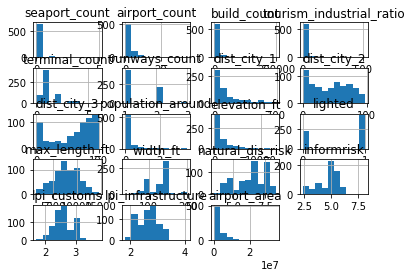

In [17]:
df_scaled.select_dtypes(include='number').hist()

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


array([[<AxesSubplot:title={'center':'seaport_count'}>,
        <AxesSubplot:title={'center':'airport_count'}>,
        <AxesSubplot:title={'center':'build_count'}>,
        <AxesSubplot:title={'center':'tourism_industrial_ratio'}>],
       [<AxesSubplot:title={'center':'terminal_count'}>,
        <AxesSubplot:title={'center':'runways_count'}>,
        <AxesSubplot:title={'center':'dist_city_1'}>,
        <AxesSubplot:title={'center':'dist_city_2'}>],
       [<AxesSubplot:title={'center':'dist_city_3'}>,
        <AxesSubplot:title={'center':'population_around'}>,
        <AxesSubplot:title={'center':'elevation_ft'}>,
        <AxesSubplot:title={'center':'lighted'}>],
       [<AxesSubplot:title={'center':'max_length_ft'}>,
        <AxesSubplot:title={'center':'width_ft'}>,
        <AxesSubplot:title={'center':'natural_dis_risk'}>,
        <AxesSubplot:title={'center':'informrisk'}>],
       [<AxesSubplot:title={'center':'lpi_customs'}>,
        <AxesSubplot:title={'center':'lpi_infrastr

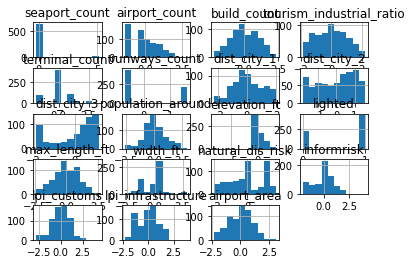

In [18]:
from sklearn.preprocessing import PowerTransformer # applying a transformer that is okay to use with negative and 0 values
scaler = PowerTransformer(method = 'yeo-johnson')


df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

df_scaled.hist()

<AxesSubplot:>

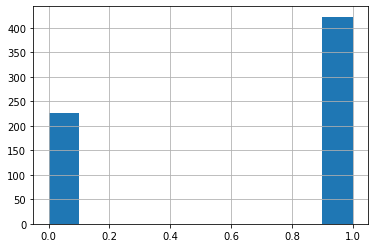

In [19]:
df_scaled['lighted'].hist()
# trying to change the distribution to more normal for the features that did not change under the 'yeo-johnson' transofrmation

array([[<AxesSubplot:title={'center':'seaport_count'}>,
        <AxesSubplot:title={'center':'airport_count'}>,
        <AxesSubplot:title={'center':'build_count'}>,
        <AxesSubplot:title={'center':'tourism_industrial_ratio'}>],
       [<AxesSubplot:title={'center':'terminal_count'}>,
        <AxesSubplot:title={'center':'runways_count'}>,
        <AxesSubplot:title={'center':'dist_city_1'}>,
        <AxesSubplot:title={'center':'dist_city_2'}>],
       [<AxesSubplot:title={'center':'dist_city_3'}>,
        <AxesSubplot:title={'center':'population_around'}>,
        <AxesSubplot:title={'center':'elevation_ft'}>,
        <AxesSubplot:title={'center':'lighted'}>],
       [<AxesSubplot:title={'center':'max_length_ft'}>,
        <AxesSubplot:title={'center':'width_ft'}>,
        <AxesSubplot:title={'center':'natural_dis_risk'}>,
        <AxesSubplot:title={'center':'informrisk'}>],
       [<AxesSubplot:title={'center':'lpi_customs'}>,
        <AxesSubplot:title={'center':'lpi_infrastr

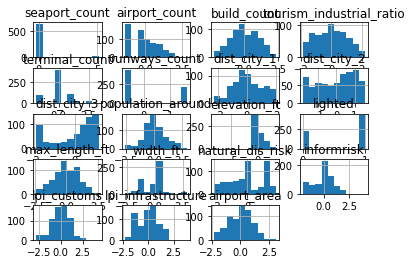

In [20]:
df_scaled.hist()

In [21]:
from sklearn.preprocessing import LabelBinarizer


In [22]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['iso_country'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)


In [23]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['aptclass'])
lb_aptclass_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_aptclass_df)

     Domestic  International  Unknown
0           1              0        0
1           1              0        0
2           1              0        0
3           0              1        0
4           1              0        0
..        ...            ...      ...
645         1              0        0
646         0              1        0
647         1              0        0
648         1              0        0
649         0              0        1

[650 rows x 3 columns]


In [24]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['apttype'])
lb_apttype_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_apttype_df)

     Airfield  Airport  Airstrip  Unknown
0           0        0         1        0
1           1        0         0        0
2           1        0         0        0
3           0        1         0        0
4           0        1         0        0
..        ...      ...       ...      ...
645         0        0         1        0
646         0        1         0        0
647         1        0         0        0
648         0        0         1        0
649         0        0         0        1

[650 rows x 4 columns]


In [25]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['authority'])
lb_authority_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_authority_df)

     Civil  Civil/Military  Military  Private  Unknown
0        1               0         0        0        0
1        1               0         0        0        0
2        0               1         0        0        0
3        0               1         0        0        0
4        1               0         0        0        0
..     ...             ...       ...      ...      ...
645      1               0         0        0        0
646      1               0         0        0        0
647      1               0         0        0        0
648      1               0         0        0        0
649      0               0         0        0        1

[650 rows x 5 columns]


In [26]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['humuse'])
lb_humuse_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_humuse_df)

     Closed  Connection  Helipad  Hub  No  Unknown  Upon Request
0         0           0        0    0   1        0             0
1         0           0        0    0   1        0             0
2         0           0        0    0   0        1             0
3         0           0        0    0   1        0             0
4         0           0        0    0   0        1             0
..      ...         ...      ...  ...  ..      ...           ...
645       0           0        0    0   1        0             0
646       0           0        0    0   1        0             0
647       0           0        0    0   1        0             0
648       0           1        0    0   0        0             0
649       0           0        0    0   0        1             0

[650 rows x 7 columns]


In [27]:
cat_names = df_scaled.copy().select_dtypes(include=['object']).drop(['iata'], axis=1).columns

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_scaled.copy()['airport_type'])
lb_airport_type_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_airport_type_df

large_airport  medium_airport  small_airport
0                0               1              0
1                0               1              0
2                0               1              0
3                1               0              0
4                0               1              0
..             ...             ...            ...
645              0               0              1
646              0               1              0
647              0               1              0
648              0               1              0
649              0               0              1

[650 rows x 3 columns]

In [28]:
df_scaled = df_scaled.copy()
df_scaled['gard'] = np.where(df_scaled['gard'].str.contains('yes'), 1, 0)

df_scaled.head()

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   

     dist_city_2  ...   apttype       authority   humuse  natural_dis_risk  \
922    -1.805792  ...  Airstrip           Civil       No          0.750987   
90      0.006020  ...  Airfield           Civil       No         -0.600567   
911    -0.409011  ...  Airfield  Civil/Military  Unknown         -0.747183   
181    -0.359437  ...   Airport  Civil/Military       No         -1.025719   
274    -1.482522  ...   Airport           Civil  Unknown          0.120368   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922   -1.055509     0.911491           0.683298    0    -0.332423   
90     0.376036    -1.322976          -1.245685    0    -0.496436   
911   -2.026888    -1.447769          -1.539557    0     0.325080   
181   -0.970249    -0.088570          -0.737541    1     0.723751   
274    0.591206    -0.322521          -0.228736    0    -0.409612   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  

[5 rows x 27 columns]

In [29]:
df_scaled

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...   apttype       authority      humuse  natural_dis_risk  \
922    -1.805792  ...  Airstrip           Civil          No          0.750987   
90      0.006020  ...  Airfield           Civil          No         -0.600567   
911    -0.409011  ...  Airfield  Civil/Military     Unknown         -0.747183   
181    -0.359437  ...   Airport  Civil/Military          No         -1.025719   
274    -1.482522  ...   Airport           Civil     Unknown          0.120368   
..           ...  ...       ...             ...         ...               ...   
106    -1.034752  ...  Airstrip           Civil          No          1.139085   
270    -1.805792  ...   Airport           Civil          No         -1.346532   
860     0.178721  ...  Airfield           Civil          No          1.040160   
435     0.767777  ...  Airstrip           Civil  Connection         -0.674489   
102     1.366630  ...   Unknown         Unknown     Unknown         -1.221837   

     informrisk  lpi_customs lpi_infrastructure gard airport_area  \
922   -1.055509     0.911491           0.683298    0    -0.332423   
90     0.376036    -1.322976          -1.245685    0    -0.496436   
911   -2.026888    -1.447769          -1.539557    0     0.325080   
181   -0.970249    -0.088570          -0.737541    1     0.723751   
274    0.591206    -0.322521          -0.228736    0    -0.409612   
..          ...          ...                ...  ...          ...   
106    1.628468    -1.260207          -1.486144    0    -0.916788   
270   -0.883515    -1.038571          -0.576935    0     0.812872   
860   -0.037345     0.319262           0.388020    0    -0.329384   
435    2.911102    -2.781828          -1.459434    0     0.588669   
102   -1.535758     1.629607           1.704797    0    -2.037369   

       airport_type  
922  medium_airport  
90   medium_airport  
911  medium_airport  
181   large_airport  
274  medium_airport  
..              ...  
106   small_airport  
270  medium_airport  
860  medium_airport  
435  medium_airport  
102   small_airport  

[650 rows x 27 columns]

In [30]:
# result_df = pd.concat([df_scaled.copy(), lb_results_df], axis=1)

# print(result_df.head())

In [31]:
lb_aptclass_df.index=df_scaled.index
merged = pd.concat([df_scaled, lb_aptclass_df], axis=1)
merged

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  natural_dis_risk  informrisk  lpi_customs  \
922    -1.805792  ...          0.750987   -1.055509     0.911491   
90      0.006020  ...         -0.600567    0.376036    -1.322976   
911    -0.409011  ...         -0.747183   -2.026888    -1.447769   
181    -0.359437  ...         -1.025719   -0.970249    -0.088570   
274    -1.482522  ...          0.120368    0.591206    -0.322521   
..           ...  ...               ...         ...          ...   
106    -1.034752  ...          1.139085    1.628468    -1.260207   
270    -1.805792  ...         -1.346532   -0.883515    -1.038571   
860     0.178721  ...          1.040160   -0.037345     0.319262   
435     0.767777  ...         -0.674489    2.911102    -2.781828   
102     1.366630  ...         -1.221837   -1.535758     1.629607   

     lpi_infrastructure  gard  airport_area    airport_type Domestic  \
922            0.683298     0     -0.332423  medium_airport        1   
90            -1.245685     0     -0.496436  medium_airport        1   
911           -1.539557     0      0.325080  medium_airport        1   
181           -0.737541     1      0.723751   large_airport        0   
274           -0.228736     0     -0.409612  medium_airport        1   
..                  ...   ...           ...             ...      ...   
106           -1.486144     0     -0.916788   small_airport        1   
270           -0.576935     0      0.812872  medium_airport        0   
860            0.388020     0     -0.329384  medium_airport        1   
435           -1.459434     0      0.588669  medium_airport        1   
102            1.704797     0     -2.037369   small_airport        0   

    International Unknown  
922             0       0  
90              0       0  
911             0       0  
181             1       0  
274             0       0  
..            ...     ...  
106             0       0  
270             1       0  
860             0       0  
435             0       0  
102             0       1  

[650 rows x 30 columns]

In [32]:
lb_apttype_df.index=merged.index
merged = pd.concat([merged, lb_apttype_df], axis=1)
merged

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  gard  airport_area    airport_type  Domestic  \
922    -1.805792  ...     0     -0.332423  medium_airport         1   
90      0.006020  ...     0     -0.496436  medium_airport         1   
911    -0.409011  ...     0      0.325080  medium_airport         1   
181    -0.359437  ...     1      0.723751   large_airport         0   
274    -1.482522  ...     0     -0.409612  medium_airport         1   
..           ...  ...   ...           ...             ...       ...   
106    -1.034752  ...     0     -0.916788   small_airport         1   
270    -1.805792  ...     0      0.812872  medium_airport         0   
860     0.178721  ...     0     -0.329384  medium_airport         1   
435     0.767777  ...     0      0.588669  medium_airport         1   
102     1.366630  ...     0     -2.037369   small_airport         0   

     International Unknown Airfield Airport Airstrip Unknown  
922              0       0        0       0        1       0  
90               0       0        1       0        0       0  
911              0       0        1       0        0       0  
181              1       0        0       1        0       0  
274              0       0        0       1        0       0  
..             ...     ...      ...     ...      ...     ...  
106              0       0        0       0        1       0  
270              1       0        0       1        0       0  
860              0       0        1       0        0       0  
435              0       0        0       0        1       0  
102              0       1        0       0        0       1  

[650 rows x 34 columns]

In [33]:
lb_authority_df.index=merged.index
merged = pd.concat([merged, lb_authority_df], axis=1)
merged

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ... Unknown  Airfield  Airport  Airstrip Unknown  Civil  \
922    -1.805792  ...       0         0        0         1       0      1   
90      0.006020  ...       0         1        0         0       0      1   
911    -0.409011  ...       0         1        0         0       0      0   
181    -0.359437  ...       0         0        1         0       0      0   
274    -1.482522  ...       0         0        1         0       0      1   
..           ...  ...     ...       ...      ...       ...     ...    ...   
106    -1.034752  ...       0         0        0         1       0      1   
270    -1.805792  ...       0         0        1         0       0      1   
860     0.178721  ...       0         1        0         0       0      1   
435     0.767777  ...       0         0        0         1       0      1   
102     1.366630  ...       1         0        0         0       1      0   

    Civil/Military Military Private Unknown  
922              0        0       0       0  
90               0        0       0       0  
911              1        0       0       0  
181              1        0       0       0  
274              0        0       0       0  
..             ...      ...     ...     ...  
106              0        0       0       0  
270              0        0       0       0  
860              0        0       0       0  
435              0        0       0       0  
102              0        0       0       1  

[650 rows x 39 columns]

In [34]:
lb_humuse_df.index=merged.index
merged = pd.concat([merged, lb_humuse_df], axis=1)
merged

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  Military  Private Unknown  Closed  Connection  Helipad  \
922    -1.805792  ...         0        0       0       0           0        0   
90      0.006020  ...         0        0       0       0           0        0   
911    -0.409011  ...         0        0       0       0           0        0   
181    -0.359437  ...         0        0       0       0           0        0   
274    -1.482522  ...         0        0       0       0           0        0   
..           ...  ...       ...      ...     ...     ...         ...      ...   
106    -1.034752  ...         0        0       0       0           0        0   
270    -1.805792  ...         0        0       0       0           0        0   
860     0.178721  ...         0        0       0       0           0        0   
435     0.767777  ...         0        0       0       0           1        0   
102     1.366630  ...         0        0       1       0           0        0   

    Hub No Unknown Upon Request  
922   0  1       0            0  
90    0  1       0            0  
911   0  0       1            0  
181   0  1       0            0  
274   0  0       1            0  
..   .. ..     ...          ...  
106   0  1       0            0  
270   0  1       0            0  
860   0  1       0            0  
435   0  0       0            0  
102   0  0       1            0  

[650 rows x 46 columns]

In [35]:
lb_airport_type_df.index=merged.index
merged = pd.concat([merged, lb_airport_type_df], axis=1)
merged

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  Closed  Connection  Helipad  Hub  No  Unknown  \
922    -1.805792  ...       0           0        0    0   1        0   
90      0.006020  ...       0           0        0    0   1        0   
911    -0.409011  ...       0           0        0    0   0        1   
181    -0.359437  ...       0           0        0    0   1        0   
274    -1.482522  ...       0           0        0    0   0        1   
..           ...  ...     ...         ...      ...  ...  ..      ...   
106    -1.034752  ...       0           0        0    0   1        0   
270    -1.805792  ...       0           0        0    0   1        0   
860     0.178721  ...       0           0        0    0   1        0   
435     0.767777  ...       0           1        0    0   0        0   
102     1.366630  ...       0           0        0    0   0        1   

    Upon Request large_airport medium_airport small_airport  
922            0             0              1             0  
90             0             0              1             0  
911            0             0              1             0  
181            0             1              0             0  
274            0             0              1             0  
..           ...           ...            ...           ...  
106            0             0              0             1  
270            0             0              1             0  
860            0             0              1             0  
435            0             0              1             0  
102            0             0              0             1  

[650 rows x 49 columns]

In [36]:
data = merged
data = data[data.columns.difference(['iso_country', 'aptclass', 'apttype', 
                                     'authority', 'humuse', 'gard', 'airport_type',
                                     'Closed', 'Unknown'])]

In [37]:
data.dtypes

Airfield                      int64
Airport                       int64
Airstrip                      int64
Civil                         int64
Civil/Military                int64
Connection                    int64
Domestic                      int64
Helipad                       int64
Hub                           int64
International                 int64
Military                      int64
No                            int64
Private                       int64
Upon Request                  int64
airport_area                float64
airport_count               float64
build_count                 float64
dist_city_1                 float64
dist_city_2                 float64
dist_city_3                 float64
elevation_ft                float64
iata                         object
informrisk                  float64
large_airport                 int64
lighted                     float64
lpi_customs                 float64
lpi_infrastructure          float64
max_length_ft               

In [38]:
# moving iata to front
data = data[ ['iata'] + [ col for col in data.columns if col != 'iata' ] ]

In [39]:
data = data.loc[:, data.columns != 'iata']


In [40]:
list(data.columns)

['Airfield',
 'Airport',
 'Airstrip',
 'Civil',
 'Civil/Military',
 'Connection',
 'Domestic',
 'Helipad',
 'Hub',
 'International',
 'Military',
 'No',
 'Private',
 'Upon Request',
 'airport_area',
 'airport_count',
 'build_count',
 'dist_city_1',
 'dist_city_2',
 'dist_city_3',
 'elevation_ft',
 'informrisk',
 'large_airport',
 'lighted',
 'lpi_customs',
 'lpi_infrastructure',
 'max_length_ft',
 'medium_airport',
 'natural_dis_risk',
 'population_around',
 'runways_count',
 'seaport_count',
 'small_airport',
 'terminal_count',
 'tourism_industrial_ratio',
 'width_ft']

In [51]:
names = ['Airfield',
 'Airport',
 'Airstrip',
 'Civil',
 'Civil/Military',
 'Connection',
 'Domestic',
 'Helipad',
 'Hub',
 'International',
 'Military',
 'No',
 'Private',
 'Upon Request',
 'airport_area',
 'airport_count',
 'build_count',
 'dist_city_1',
 'dist_city_2',
 'dist_city_3',
 'elevation_ft',
 'informrisk',
 'large_airport',
 'lighted',
 'lpi_customs',
 'lpi_infrastructure',
 'max_length_ft',
 'medium_airport',
 'natural_dis_risk',
 'population_around',
 'runways_count',
 'seaport_count',
 'small_airport',
 'terminal_count',
 'tourism_industrial_ratio',
 'width_ft']

data = data.values 

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [67]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=4)
Kmean.fit(data)

KMeans(n_clusters=4)

In [68]:
Kmean.cluster_centers_

array([[ 2.37500000e-01,  1.75000000e-01,  2.12500000e-01,
         4.25000000e-01,  3.75000000e-02,  1.25000000e-02,
         5.00000000e-01,  4.33680869e-19,  0.00000000e+00,
         6.25000000e-02,  1.25000000e-02,  5.37500000e-01,
         1.25000000e-02,  1.25000000e-02, -8.22827756e-01,
        -2.84499634e-01, -2.55381781e-01, -5.81977336e-01,
        -1.41330155e+00, -1.62393624e+00, -4.21995388e-01,
        -1.15686068e-01,  1.25000000e-02,  3.25000000e-01,
        -5.31175631e-02, -2.35741556e-01, -7.77256013e-01,
         5.25000000e-01, -1.22621021e-01, -1.40528363e+00,
        -2.26381492e-01, -1.29515261e-01,  4.62500000e-01,
        -7.44395495e-01,  1.27081060e-01, -6.96491480e-01],
       [ 1.34831461e-01,  7.35955056e-01,  2.80898876e-02,
         6.51685393e-01,  1.74157303e-01,  4.49438202e-02,
         3.53932584e-01, -1.30104261e-18,  1.68539326e-02,
         5.22471910e-01,  1.38777878e-17,  5.44943820e-01,
         8.67361738e-19,  1.12359551e-02,  5.89827785e-

In [70]:
Kmean.labels_

array([0, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       0, 1, 3, 3, 1, 3, 2, 3, 1, 2, 3, 2, 3, 2, 0, 3, 0, 3, 3, 2, 1, 1,
       3, 1, 1, 2, 3, 1, 1, 3, 2, 2, 2, 1, 3, 2, 2, 1, 2, 1, 0, 2, 3, 2,
       0, 2, 1, 3, 3, 1, 2, 0, 2, 0, 3, 0, 1, 3, 1, 3, 1, 2, 1, 1, 3, 2,
       0, 1, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 0, 3, 3, 1, 3, 1, 2, 1, 3,
       3, 0, 3, 3, 2, 1, 2, 3, 3, 3, 0, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 2,
       3, 2, 3, 3, 0, 0, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1, 2, 3, 0, 3, 3, 3,
       2, 1, 1, 2, 2, 1, 3, 1, 2, 3, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 1, 1,
       2, 3, 2, 3, 3, 1, 1, 1, 1, 3, 2, 1, 3, 1, 3, 3, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 3, 1, 1, 3, 3, 2, 0, 2, 0, 0, 3, 1, 2, 1, 2, 3, 3, 2, 1,
       1, 3, 2, 3, 1, 3, 2, 1, 3, 1, 3, 0, 2, 2, 2, 1, 3, 3, 2, 3, 1, 2,
       1, 2, 1, 2, 0, 3, 0, 3, 2, 3, 3, 0, 1, 1, 2, 2, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 1, 2, 1, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 0, 2, 1, 0, 2,
       3, 2, 2, 3, 2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 2,

## xxx

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [72]:
data

array([[ 0.        ,  0.        ,  1.        , ..., -0.09176211,
         1.47650629, -1.13430555],
       [ 1.        ,  0.        ,  0.        , ...,  0.97811571,
        -0.91120388, -1.13430555],
       [ 1.        ,  0.        ,  0.        , ..., -0.09176211,
         0.78528478,  0.59790943],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.09176211,
        -0.32226601, -1.19688395],
       [ 0.        ,  0.        ,  1.        , ...,  1.75775396,
        -0.95031969,  0.67921775],
       [ 0.        ,  0.        ,  0.        , ..., -1.84500167,
         0.67287154, -0.07073227]])

In [73]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data)

KMeans(n_clusters=2)

In [74]:
kmeans.inertia_

11523.322316084235

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " 

Text(0, 0.5, 'Inertia')

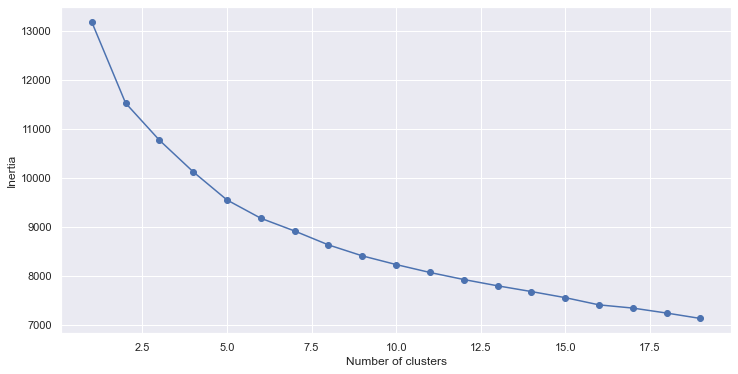

In [77]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [78]:
# k means using 10 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 10, init='k-means++')
kmeans.fit(data)
pred = kmeans.predict(data)

/Users/mariabrowarska/anaconda3/envs/osm-som/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [80]:
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    107
9     81
2     81
4     75
7     72
1     61
6     57
5     56
8     36
3     24
Name: cluster, dtype: int64

In [104]:
labels = kmeans.labels_
labels

array([5, 4, 2, 2, 4, 7, 3, 2, 9, 2, 7, 6, 2, 5, 6, 2, 3, 0, 6, 2, 5, 4,
       5, 7, 0, 9, 7, 9, 1, 8, 2, 4, 9, 0, 9, 1, 3, 9, 5, 0, 9, 1, 7, 6,
       0, 7, 6, 4, 9, 2, 2, 0, 1, 8, 4, 2, 3, 1, 6, 6, 0, 7, 5, 1, 9, 1,
       5, 1, 2, 0, 9, 2, 6, 5, 4, 1, 0, 5, 7, 9, 7, 4, 7, 1, 2, 7, 9, 4,
       5, 2, 7, 0, 1, 9, 0, 0, 1, 1, 9, 0, 4, 4, 0, 0, 0, 0, 2, 1, 7, 0,
       9, 5, 0, 9, 1, 7, 1, 9, 9, 8, 4, 0, 2, 0, 5, 7, 2, 0, 3, 8, 5, 6,
       9, 2, 9, 8, 5, 4, 1, 0, 6, 6, 2, 7, 7, 9, 0, 7, 6, 0, 4, 9, 0, 0,
       1, 2, 9, 6, 1, 2, 8, 2, 1, 0, 8, 7, 0, 9, 7, 3, 7, 0, 0, 7, 2, 2,
       4, 3, 1, 6, 4, 2, 2, 7, 4, 0, 4, 7, 0, 3, 8, 7, 1, 4, 2, 0, 1, 4,
       4, 8, 4, 9, 2, 7, 9, 9, 6, 5, 8, 4, 4, 7, 7, 6, 4, 6, 9, 0, 6, 2,
       2, 9, 4, 0, 2, 9, 4, 2, 9, 7, 9, 5, 1, 8, 6, 7, 9, 4, 0, 0, 2, 1,
       7, 1, 0, 6, 2, 0, 5, 8, 1, 9, 0, 5, 2, 7, 6, 4, 4, 9, 9, 4, 7, 5,
       1, 2, 2, 2, 8, 7, 0, 0, 0, 1, 9, 7, 2, 7, 9, 9, 4, 5, 1, 2, 5, 1,
       9, 6, 4, 9, 6, 2, 2, 6, 0, 4, 0, 3, 7, 0, 3,

In [105]:
label = pd.DataFrame(data=labels)
print(label)

     0
0    5
1    4
2    2
3    2
4    4
..  ..
645  5
646  7
647  0
648  7
649  8

[650 rows x 1 columns]


In [106]:
label.index=merged.index
merged_clusters = pd.concat([merged, label], axis=1)
merged_clusters

iata iso_country  seaport_count  airport_count  build_count  \
922  VCS          VN      -0.195803      -1.328615    -0.854444   
90   BIR          NP      -0.195803       1.166071     1.732210   
911  UPB          CU      -0.195803       0.315171    -0.239229   
181  CMB          LK      -0.195803       1.607052     1.662794   
274  EOH          CO      -0.195803       0.684086     1.371686   
..   ...         ...            ...            ...          ...   
106  BMO          MM      -0.195803      -0.245932    -0.337550   
270  ELG          DZ      -0.195803      -1.328615    -0.526789   
860  TKG          ID      -0.195803      -0.245932    -0.241902   
435  KAC          SY      -0.195803       0.315171     0.197381   
102  BLG          MY      -0.195803      -0.245932    -0.773751   

     tourism_industrial_ratio  terminal_count  runways_count  dist_city_1  \
922                  1.476506       -0.091762       1.414785    -2.237748   
90                  -0.911204        0.978116       1.414785    -1.321926   
911                  0.785285       -0.091762      -0.702849     0.600628   
181                 -1.138971       -0.091762      -0.702849     0.137036   
274                 -0.092884       -0.091762      -0.702849    -1.004068   
..                        ...             ...            ...          ...   
106                  1.026688       -1.845002      -0.702849    -1.520479   
270                  1.490090        0.978116       1.414785    -0.687347   
860                 -0.322266       -0.091762       1.414785     0.592793   
435                 -0.950320        1.757754      -0.702849    -0.858763   
102                  0.672872       -1.845002      -0.702849     0.655278   

     dist_city_2  ...  Connection  Helipad  Hub  No  Unknown  Upon Request  \
922    -1.805792  ...           0        0    0   1        0             0   
90      0.006020  ...           0        0    0   1        0             0   
911    -0.409011  ...           0        0    0   0        1             0   
181    -0.359437  ...           0        0    0   1        0             0   
274    -1.482522  ...           0        0    0   0        1             0   
..           ...  ...         ...      ...  ...  ..      ...           ...   
106    -1.034752  ...           0        0    0   1        0             0   
270    -1.805792  ...           0        0    0   1        0             0   
860     0.178721  ...           0        0    0   1        0             0   
435     0.767777  ...           1        0    0   0        0             0   
102     1.366630  ...           0        0    0   0        1             0   

    large_airport medium_airport small_airport  0  
922             0              1             0  5  
90              0              1             0  4  
911             0              1             0  2  
181             1              0             0  2  
274             0              1             0  4  
..            ...            ...           ... ..  
106             0              0             1  5  
270             0              1             0  7  
860             0              1             0  0  
435             0              1             0  7  
102             0              0             1  8  

[650 rows x 50 columns]

In [108]:
merged_clusters.to_csv(r'/Users/mariabrowarska/Downloads/export_clusters2.csv', index=False, header=True)

## XXX

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)

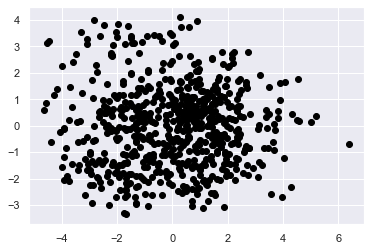

In [117]:
import pylab as pl
pl.scatter(pca_2d[:,0],pca_2d[:,1],c='black')
pl.show()

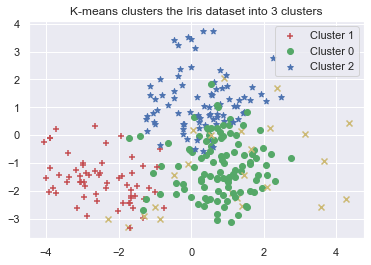

In [120]:
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='x')
pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 0', 'Cluster 2'])
pl.title('K-means clusters the Iris dataset into 3 clusters')
pl.show()

In [124]:
>>> from sklearn.decomposition import PCA
>>> from sklearn.cluster import KMeans

>>> import pylab as pl

>>> pca = PCA(n_components=36).fit(data)
>>> pca_2d = pca.transform(data)
>>> pl.figure('Reference Plot')
>>> pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c='r')
>>> kmeans = KMeans(n_clusters=10, random_state=111)
>>> kmeans.fit(data)
>>> pl.figure('K-means with 3 clusters')
>>> pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
>>> pl.show()

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(data)
kmeans.cluster_centers_.shape

(10, 36)

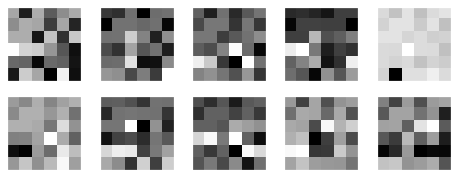

In [65]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 6)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

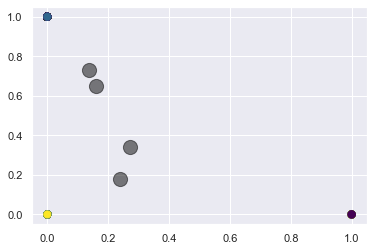

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [56]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');